# Assignment 1 - Intelligent Machines, Ethics and Law (COMP2400/6400)

### Name: Blair Andrews

### Student Id: 46977880

# Facial Recognition

In this assignment, you will implement a **facial recognition system** using Python and explore its social implications. This assessment is designed to familiarize you with the process of training a facial recognition model, implementing it using a Python program; and critically examine the impact of facial recognition systems on society. This assignment will be marked out of 100, and will count towards **25%** of the total unit assessment.

## Olivetti Faces Dataset Description

The Olivetti Faces dataset is a popular dataset for testing and evaluating face recognition algorithms. It was created by AT&T Laboratories Cambridge and contains a set of grayscale images of faces, captured under different lighting conditions, facial expressions, and poses.

The dataset contains a total of **400 images**, each of size **64 x 64 pixels**. There are 10 different images for each of 40 distinct individuals, with each individual photographed in different sessions. The images were taken with a Canon camera, under controlled conditions that included a uniform background and controlled lighting.

The Olivetti Faces dataset is often used for tasks such as face recognition, face detection, and facial expression analysis. The dataset is popular because it is relatively small, making it easy to work with, and because it contains images that capture a wide range of facial variations.

The dataset is available in the scikit-learn Python library, which makes it easy to load and use for machine learning tasks. In scikit-learn, the Olivetti Faces dataset is provided as a dictionary with two keys: data and images. The data key contains a 2D array of the flattened image data, while the images key contains a 3D array of the original image data.


## Task 0 - (0 Marks)

Load the dataset using Python. How many images are in the dataset? 			

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from math import ceil
from sklearn.model_selection import StratifiedShuffleSplit # split data randomly into train & test sets by preserving train/test ratio␣ →across classes 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Load the dataset
faces = datasets.fetch_olivetti_faces()
data = faces.data       # Input data or input features
target = faces.target   # Label or Class or Variable to be predicted

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=100, whiten=True)
X = pca.fit_transform(data)              ## X Represents the data and you will use for model training

# Size of the datset  
X.shape     # (Number of images, input feature)

(400, 100)

There are 400 images in the dataset.

## Task 1: Data Visualisation - (10 marks)

Visualize some (at least five) of the images in the dataset. Are there any noticeable differences between the images of different individuals? (Hint: You can use imshow() method to visualise images)

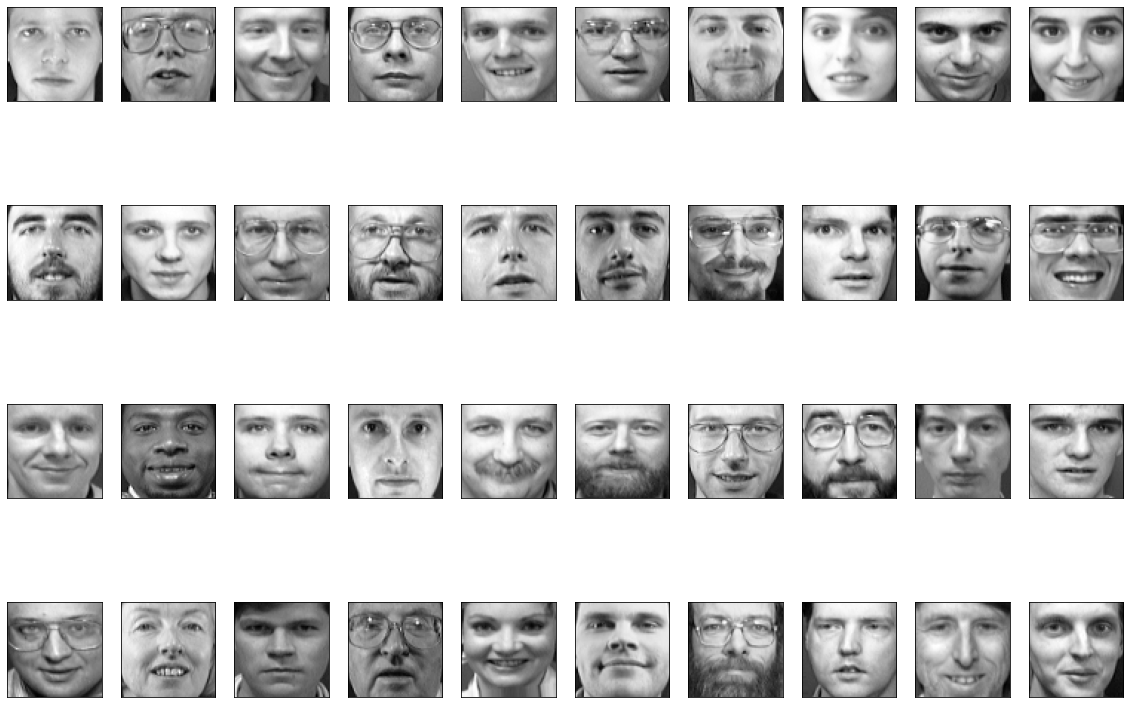

In [142]:
images = faces.images #generating images from the faces variable to display

cols = 10
rows = ceil(40/cols)
fig, axis = plt.subplots(figsize=(20,14), nrows=rows, ncols=cols) #determining number of columns, rows and the figure (subplot) size

for i in range(40):
    person = target == i 
    image = images[person][0] #generating a unique person based on target
    axis[i // cols][i % cols].imshow(image, cmap="gray") #generating each individual person on the figure axis

plt.setp(axis, xticks=[], yticks=[]) #removing matlab background for better aesthetic
plt.show()

From these images we can see several different people making different faces. The photos are very zoomed in.

The different images show different angles of the people. Assumably these photos were taken like this to assist an AI algorithm in determining a human from all angles and with all types of facial features.

## Task 2: Training a Traditional Machine Learning Model	- (25 Marks)

Train a machine learning model for facial recognition with a machine learning algorithm discussed during the lectures **(Week 2 to Week 4)** (or any other appropriate algorithm not covered in the lectures). Which machine learning algorithm did you choose, and why? What is the accuracy of the model on the test set? **(Use 80% of the data for Training and 20% for testing)**

In [50]:
def machineLearn():
    imgSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2) # get the train and test indexes 
    train_index, test_index = next(imgSplit.split(data, target)) # split a and b into train & test sets 

    a_train, a_test = data[train_index], data[test_index] 
    b_train, b_test = target[train_index], target[test_index] #setting the indexes to variables

    classifier = SVC(kernel="rbf", gamma="scale") #initialising SVM algorithm
    classifier.fit(a_train, b_train) #fitting the SVM model to the data we've fed it, training it, in another sense
    prediction = classifier.predict(a_test) #creating a 'prediction' variable where it predicts what the model may achieve
    
    accuracy = accuracy_score(b_test, prediction) #calculating accuracy of algorithm 

    correctNum = np.sum(b_test == prediction) 

    incorrectNum = len(b_test) - correctNum

    return accuracy, correctNum, incorrectNum, b_train, b_test

accuracy = []
correctNum = []
incorrectNum = []

for i in range(20):
    proc = machineLearn()
    accuracy.append(proc[0] * 100)
    correctNum.append(proc[1])
    incorrectNum.append(proc[2])

print("Size of training sample: ", len(proc[3]))
print("Size of test sample: ", len(proc[4]))

accuracyAvg = sum(accuracy)/len(accuracy)
correctAvg = round(sum(correctNum)/len(correctNum))
incorrectAvg = round(sum(incorrectNum)/len(incorrectNum))

print("Average number of correctly classified samples per 20 iterations of SVM algorithm: ", correctAvg)
print("Average number of incorrectly classified samples per 20 iterations of SVM algorithm: ", incorrectAvg)
print("Average accuracy of 20 iterations of SVM algorithm: ", accuracyAvg, "%")

Size of training sample:  320
Size of test sample:  80
Average number of correctly classified samples per 20 iterations of SVM algorithm:  76
Average number of incorrectly classified samples per 20 iterations of SVM algorithm:  4
Average accuracy of 20 iterations of SVM algorithm:  95.25 %


I chose to use the traditional machine learning algorithm SVM (Support Vector Machines). SVMs are supervised learning models that use algorithms to analyse data for classification. I used the SVM algorithm as it tends to have high accuracy rates (as due to the 93%-95% accuracy rate from 20 iterations), and are extremely efficient to train. 

I chose to iterate over the algorithm 20 times to gain an average success rate, to ensure that there are no sudden outliers of huge failures within the algorithm. I am able to do massive iterations due to the lightweight design of the SVM algorithm, and the process only takes 2-3 seconds to execute.

## Task 3: Training a Neural Network-based Model - (25 Marks)

Train an artificial neural network (Multi-Layered Perceptron Classifier (MLP)) model for facial recognition. What is the accuracy of the model on the test set? **(Use 80% of the data for Training and 20% for testing)**

In [53]:
def MLPLearn():
    imgSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
    train_index, test_index = next(imgSplit.split(data, target))

    a_train, a_test = data[train_index], data[test_index]
    b_train, b_test = target[train_index], target[test_index]

    classif = MLPClassifier(solver='lbfgs')

    classif.fit(a_train, b_train)

    pred = classif.predict(a_test)

    accuracy = accuracy_score(b_test, pred)

    correctNum = np.sum(b_test == pred)

    incorrectNum = len(b_test) - correctNum

    return accuracy, correctNum, incorrectNum, b_train, b_test

accuracyMLP = []
correctNumMLP = []
incorrectNumMLP = []

for i in range(20):
    procMLP = MLPLearn()
    accuracyMLP.append(procMLP[0] * 100)
    correctNumMLP.append(procMLP[1])
    incorrectNumMLP.append(procMLP[2])

print("Size of training sample: ", len(procMLP[3]))
print("Size of test sample: ", len(procMLP[4]))

accuracyAvgMLP = sum(accuracyMLP)/len(accuracyMLP)
correctAvgMLP = round(sum(correctNumMLP)/len(correctNumMLP))
incorrectAvgMLP = round(sum(incorrectNumMLP)/len(incorrectNumMLP))

print("Average number of correctly classified samples per 20 iterations of MLP algorithm: ", correctAvgMLP)
print("Average number of incorrectly classified samples per 20 iterations of MLP algorithm: ", incorrectAvgMLP)
print("Average accuracy of 20 iterations of MLP algorithm: ", accuracyAvgMLP, "%")


Size of training sample:  320
Size of test sample:  80
Average number of correctly classified samples per 20 iterations of MLP algorithm:  70
Average number of incorrectly classified samples per 20 iterations of MLP algorithm:  10
Average accuracy of 20 iterations of MLP algorithm:  88.0625 %


## Task 4: Comparison - (20 Marks)

Compare the performance of the traditional machine learning model and the artificial neural network (MLP). Which model performed better, and why? Did the use of MLP instead of traditional machine learning algorithms involve any tradeoff(s)? If so, briefly describe them. **Make sure you provide the visualisation of results for the purpose of comparison.**

Text(0, 0.5, 'Number of Incorrect Classifications')

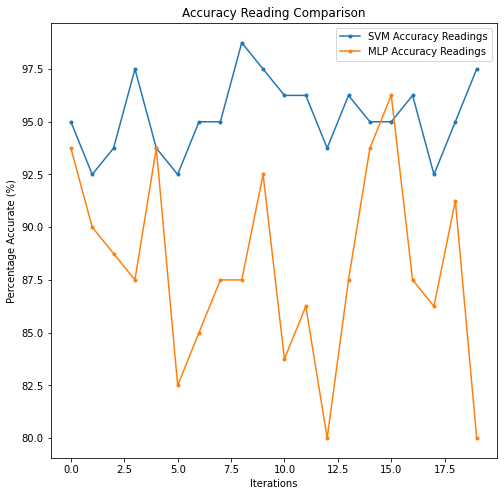

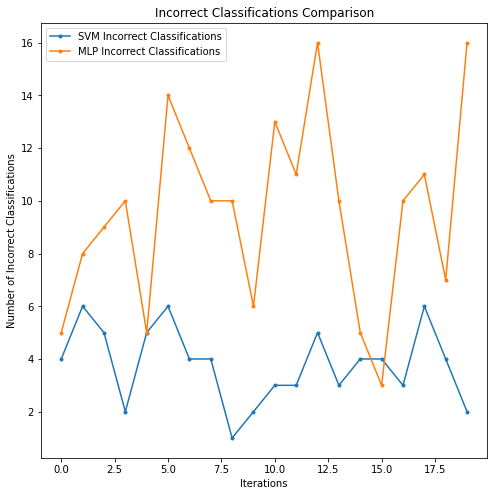

In [79]:
dfAccuracy = pd.DataFrame({
    'SVM Accuracy Readings': accuracy,
    'MLP Accuracy Readings': accuracyMLP
})
#initialising dataframes for use with plotting
dfCorrectness = pd.DataFrame({
    'SVM Incorrect Classifications': incorrectNum,
    'MLP Incorrect Classifications': incorrectNumMLP
})
#creating line graphs of readings over each iteration
axAccuracy = dfAccuracy.plot.line(figsize=(8,8), style='.-', title='Accuracy Reading Comparison')
axAccuracy.set_xlabel('Iterations')
axAccuracy.set_ylabel('Percentage Accurate (%)')
axCorrectness = dfCorrectness.plot.line(figsize=(8,8), style='.-', title='Incorrect Classifications Comparison')
axCorrectness.set_xlabel('Iterations')
axCorrectness.set_ylabel('Number of Incorrect Classifications')

***Your analysis and dicussion will go here*** 

Through the visualisations provided in both questions, we can ascertain that the SVM algorithm is a lot more accurate in its readings. The SVM algorithm typically scores in the 92.5-98 percent range, while the MLP algorithm wildly scores between 80-96, making it overall less accurate, and a lot less reliable than the SVM algorithm. 

The use of the MLP algorithm had many tradeoffs, given that the MLP algorithm is a LOT less efficient than SVM. When doing 20 iterations of each algorithm, SVM took merely 2-3 seconds, while MLP took more than a minute. Even then, SVM still scored a higher overall accuracy than MLP. 

The SVM algorithm works well under circumstances where there is a clear margin of separation between targets, and with the Olivetti faces there is a somewhat clear margin of separation, given the high accuracy. The SVM algorithm is also extremely memory efficient, because it uses a subset of training points in the prediction phase, and not using every single one. In turn, it makes the SVM algorithm very efficient. 

MLPs are not great to use for image classification, as it disregards any difference in image processing. For example, if the MLP algorithm saw two images where one was a person, and another was a flipped version of the person, the algorithm will try and correct itself to where it will be certain that the person's mouth will appear on both the bottom of their face and the top of their face in any other image fed to it. This could potentially explain why the MLP algorithm was a lot less accurate than SVM.

## Task 5: Social Implications - (20 Marks)

Finally, you will research and discuss two specific social implications of facial recognition technology:

1. **Bias and discrimination:** How can facial recognition technology lead to bias and discrimination? What steps can we take to address these issues?
2. **Law enforcement:** How is facial recognition technology being used by law enforcement agencies? What are the benefits and risks of using this technology in law enforcement?

***Discussion for Part 1*** 

***Discussion for Part 2***